In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import plotly.express as px 

In [2]:
dataFile = "static/data/sd_data_combined.csv"

In [3]:
mn_ed_df = pd.read_csv(dataFile)
mn_ed_df.head()

,censusid,popcount,mhi,id,dname,lat,lng,admtotal,generalfundexpends,perpupilexpends,avgteachersalary,readingproficiency,metro_area
0,2700001,800,49091,2700001,Mountain Iron-Buhl School District,47.565327,-92.723232,518.55,6855707,13220.92,59868,63.232857,False
1,2700005,2200,52576,2700005,United South Central School District,43.679027,-93.714026,702.56,8165950,11623.14,56002,60.744286,False
2,2700006,2200,62217,2700006,Maple River School District,43.906126,-93.988502,899.91,9650272,10723.60,53160,66.985714,False
3,2700007,1500,56705,2700007,Kingsland Public School District,43.695038,-92.317972,563.40,5282881,9376.79,52752,62.052857,False
4,2700008,7200,54809,2700008,St. Louis County School District,47.788798,-92.525730,1983.31,26947153,13586.96,56891,54.975714,False


In [4]:
mn_ed_df.drop(mn_ed_df[mn_ed_df["avgteachersalary"] == 0].index, inplace = True)
mn_ed_df["avgteachersalary"] = pd.to_numeric(mn_ed_df["avgteachersalary"])
mn_ed_df.rename(columns= {"avgteachersalary" : "Avg. Salary"}, inplace=True)
mn_ed_df.head()

,censusid,popcount,mhi,id,dname,lat,lng,admtotal,generalfundexpends,perpupilexpends,Avg. Salary,readingproficiency,metro_area
0,2700001,800,49091,2700001,Mountain Iron-Buhl School District,47.565327,-92.723232,518.55,6855707,13220.92,59868,63.232857,False
1,2700005,2200,52576,2700005,United South Central School District,43.679027,-93.714026,702.56,8165950,11623.14,56002,60.744286,False
2,2700006,2200,62217,2700006,Maple River School District,43.906126,-93.988502,899.91,9650272,10723.60,53160,66.985714,False
3,2700007,1500,56705,2700007,Kingsland Public School District,43.695038,-92.317972,563.40,5282881,9376.79,52752,62.052857,False
4,2700008,7200,54809,2700008,St. Louis County School District,47.788798,-92.525730,1983.31,26947153,13586.96,56891,54.975714,False


In [5]:
mn_ed_df["Avg. Salary"].describe()

count      329.000000
mean     54986.580547
std       7147.272739
min      31994.000000
25%      50466.000000
50%      54237.000000
75%      59222.000000
max      75489.000000
Name: Avg. Salary, dtype: float64

In [6]:
trimmed_df = mn_ed_df.loc[mn_ed_df["metro_area"] == True]
trimmed_df.rename(columns= {"Avg. Salary": "Avg. Salary Metro only"}, inplace=True)
trimmed_df.head()
trimmed_df.describe()

C:\Users\qops\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,censusid,popcount,mhi,id,lat,lng,admtotal,generalfundexpends,perpupilexpends,Avg. Salary Metro only,readingproficiency
count,4.600000e+01,46.000000,46.000000,4.600000e+01,46.000000,46.000000,46.000000,4.600000e+01,46.000000,46.000000,46.000000
mean,2.723554e+06,5694.565217,83049.847826,2.723554e+06,44.919832,-93.290733,9072.400217,1.007925e+08,10729.610435,65246.913043,60.397050
std,1.188765e+04,6563.791488,18153.521125,1.188765e+04,0.190469,0.258781,8981.941405,1.060165e+08,915.659630,6231.836123,12.477835
min,2.703180e+06,750.000000,46815.000000,2.703180e+06,44.539610,-93.903499,679.420000,6.804649e+06,9202.510000,49924.000000,22.428571
25%,2.712698e+06,2175.000000,70208.250000,2.712698e+06,44.797103,-93.426538,3489.262500,3.540309e+07,10036.665000,62390.500000,52.108929
50%,2.723880e+06,4200.000000,83211.000000,2.723880e+06,44.940777,-93.289095,6717.150000,7.139488e+07,10701.865000,65070.000000,62.794286
75%,2.733315e+06,5550.000000,96525.750000,2.733315e+06,45.048588,-93.110975,10593.627500,1.149651e+08,11326.235000,70596.000000,68.060714
max,2.742360e+06,36500.000000,119294.000000,2.742360e+06,45.380463,-92.835343,38121.710000,4.390538e+08,12879.770000,75489.000000,81.484286


In [7]:
# salaries = mn_ed_df["Avg. Salary"]
# metro_salaries = trimmed_df["Avg. Salary Metro only"]
# data = [salaries, metro_salaries]
# ticks = [['Statewide', 'Metro Only']]

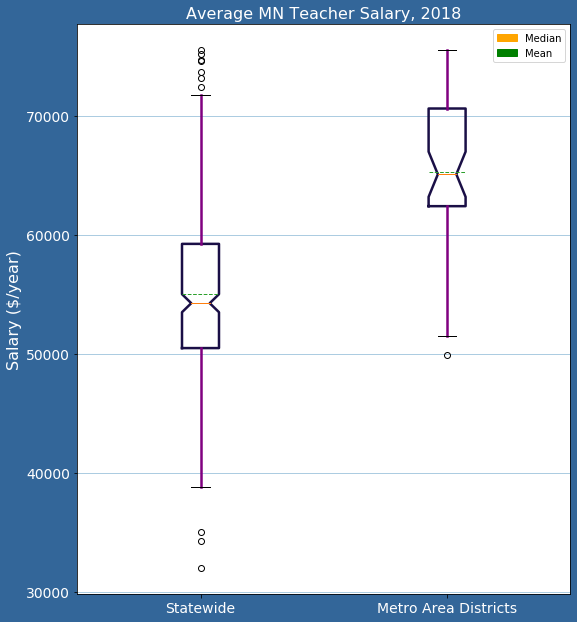

In [8]:
salaries = mn_ed_df["Avg. Salary"]
metro_salaries = trimmed_df["Avg. Salary Metro only"]
data = [salaries, metro_salaries]
ticks = [['Statewide', 'Metro Only']]
fig, ax = plt.subplots(figsize=(7.0, 8.75))
color=('#ebdef0')
ax.set_title("Average MN Teacher Salary, 2018", fontsize=16, color="white")
ax.set_ylabel("Salary ($/year)", fontsize=16, color="white")
bplot = ax.boxplot(data, showmeans=True, meanline=True, notch=True, showfliers=True)
ax.yaxis.grid(True, linestyle = '-', which='major', color='#8db9d6', alpha=0.9)
plt.setp(bplot['boxes'], color="#1a0f46", linewidth=2.5)
plt.setp(bplot['whiskers'], color="purple", linewidth=2.5)
plt.setp(bplot['fliers'], color="#e80e75")
ax.set_xticklabels(['Statewide', 'Metro Area Districts'])
ax.tick_params(labelcolor="white", labelsize=14)
plt.show
green_dash = mpatches.Patch(color="green", label = "Mean")
orange_patch = mpatches.Patch(color="orange", label= "Median")
plt.legend(handles=[orange_patch, green_dash],loc='best')
fig.tight_layout()
fig.patch.set_facecolor("#336699")
plt.gcf().subplots_adjust(left=0)
plt.savefig("static/salary_box_plot_compare.png", bbox_inches='tight')

In [ ]:
%matplotlib inline
import plotly.express as px
df = px.data.tips()
fig = px.box(df, y="total_bill")
fig.show()